<a href="https://colab.research.google.com/github/Yanaput/EGCI463-pattern-recognition-project/blob/main/nsynth_data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load dataset from https://huggingface.co/datasets/TwinkStart/Nsynth

In [ ]:
import numpy as np
import os
import pandas as pd

In [ ]:
!pip install datasets

# Load dataset

In [ ]:
from datasets import load_dataset
ds = load_dataset("TwinkStart/Nsynth")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.39k [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


test-00000-of-00006.parquet:   0%|          | 0.00/68.8M [00:00<?, ?B/s]

test-00001-of-00006.parquet:   0%|          | 0.00/68.7M [00:00<?, ?B/s]

test-00002-of-00006.parquet:   0%|          | 0.00/68.8M [00:00<?, ?B/s]

test-00003-of-00006.parquet:   0%|          | 0.00/68.2M [00:00<?, ?B/s]

test-00004-of-00006.parquet:   0%|          | 0.00/67.7M [00:00<?, ?B/s]

test-00005-of-00006.parquet:   0%|          | 0.00/69.0M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4096 [00:00<?, ? examples/s]

In [ ]:
print(f"Dataset size: {len(ds['test'])}")

Dataset size: 4096


In [ ]:
df = pd.DataFrame(ds['test'])

In [ ]:
df

,note,note_str,instrument,instrument_str,pitch,velocity,sample_rate,qualities,qualities_str,instrument_family,instrument_family_str,instrument_source,instrument_source_str,WavPath,audio
0,159151,guitar_acoustic_010-074-100,219,guitar_acoustic_010,74,100,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[],3,guitar,0,acoustic,audio/test/guitar_acoustic_010-074-100.wav,"{'path': 'guitar_acoustic_010-074-100.wav', 'a..."
1,165690,organ_electronic_113-048-075,958,organ_electronic_113,48,75,16000,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[dark],6,organ,1,electronic,audio/test/organ_electronic_113-048-075.wav,"{'path': 'organ_electronic_113-048-075.wav', '..."
2,212904,bass_synthetic_098-106-100,803,bass_synthetic_098,106,100,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[],0,bass,2,synthetic,audio/test/bass_synthetic_098-106-100.wav,"{'path': 'bass_synthetic_098-106-100.wav', 'ar..."
3,149013,bass_synthetic_033-100-100,417,bass_synthetic_033,100,100,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[],0,bass,2,synthetic,audio/test/bass_synthetic_033-100-100.wav,"{'path': 'bass_synthetic_033-100-100.wav', 'ar..."
4,230398,keyboard_synthetic_000-095-127,577,keyboard_synthetic_000,95,127,16000,"[1, 0, 1, 1, 0, 0, 1, 1, 0, 0]","[bright, distortion, fast_decay, nonlinear_env...",4,keyboard,2,synthetic,audio/test/keyboard_synthetic_000-095-127.wav,"{'path': 'keyboard_synthetic_000-095-127.wav',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,208754,keyboard_synthetic_000-042-050,577,keyboard_synthetic_000,42,50,16000,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 0]","[distortion, fast_decay, nonlinear_env]",4,keyboard,2,synthetic,audio/test/keyboard_synthetic_000-042-050.wav,"{'path': 'keyboard_synthetic_000-042-050.wav',..."
4092,229348,bass_electronic_025-048-050,872,bass_electronic_025,48,50,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[],0,bass,1,electronic,audio/test/bass_electronic_025-048-050.wav,"{'path': 'bass_electronic_025-048-050.wav', 'a..."
4093,163864,mallet_acoustic_062-043-100,644,mallet_acoustic_062,43,100,16000,"[0, 1, 0, 0, 1, 1, 0, 0, 0, 0]","[dark, long_release, multiphonic]",5,mallet,0,acoustic,audio/test/mallet_acoustic_062-043-100.wav,"{'path': 'mallet_acoustic_062-043-100.wav', 'a..."
4094,2004,vocal_acoustic_000-059-127,46,vocal_acoustic_000,59,127,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",[reverb],10,vocal,0,acoustic,audio/test/vocal_acoustic_000-059-127.wav,"{'path': 'vocal_acoustic_000-059-127.wav', 'ar..."


In [ ]:
class_dict = {}

for inst in df['instrument_family_str']:
    class_dict[inst] = 0 if inst not in class_dict else class_dict[inst] + 1

class_dict

{'guitar': 651,
 'organ': 501,
 'bass': 842,
 'keyboard': 765,
 'reed': 234,
 'string': 305,
 'mallet': 201,
 'flute': 179,
 'brass': 268,
 'vocal': 140}

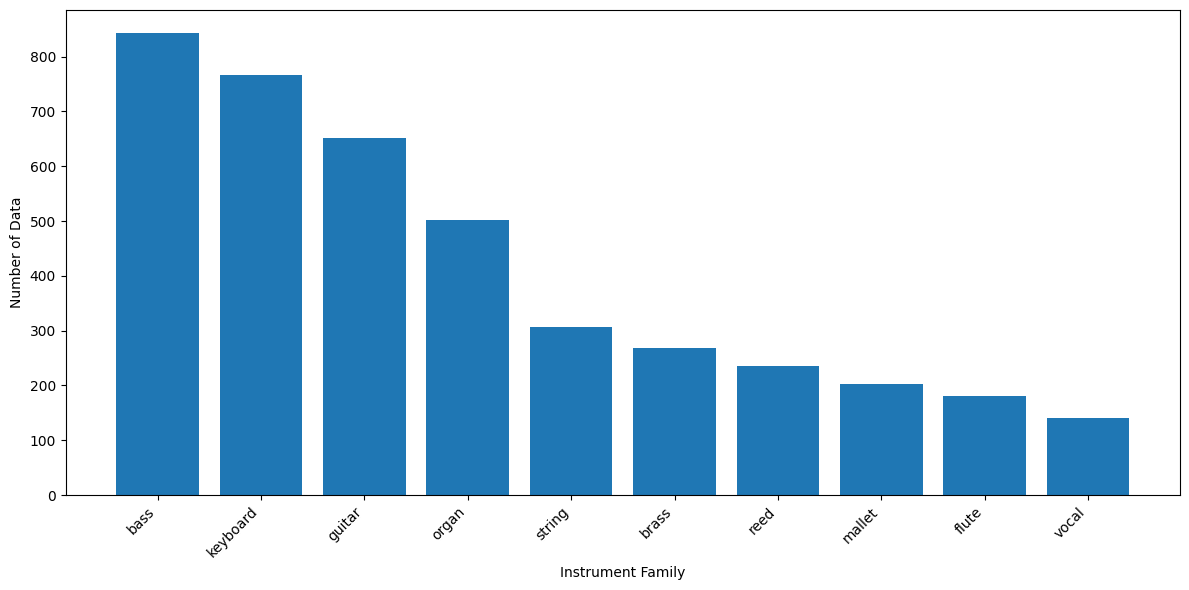

In [ ]:
import matplotlib.pyplot as plt

instrument_family_counts = df['instrument_family_str'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(instrument_family_counts.index, instrument_family_counts.values)
plt.xlabel('Instrument Family')
plt.ylabel('Number of Data')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

In [ ]:
example_audio_row = df[df['WavPath'].str.endswith('audio/test/vocal_acoustic_000-059-127.wav')]
example_audio = example_audio_row['audio'].values[0]
example_audio

{'path': 'vocal_acoustic_000-059-127.wav',
 'array': array([ 0.00000000e+00, -3.05175781e-05, -1.22070312e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]),
 'sampling_rate': 16000}

In [ ]:
np.shape(example_audio['array'])

(64000,)

In [ ]:
# exsample audio
import IPython.display as ipd
ipd.Audio(example_audio['array'], rate=example_audio['sampling_rate'])


# Preprocessing

In [ ]:
import librosa
import librosa.display
import numpy as np

def get_log_mel_spectrogram(audio_data):
    """Calculates and returns the log-mel spectrogram for the given audio data.
    Returns:
        numpy.ndarray: Log-mel spectrogram.
        numpy.ndarray: Trimmed log-mel spectrogram.
        size = (n_mel, 1 + (len(y)/sr)/hop_length) = (n_mel, 1+(duration/hop_length))
    """
    y_ori = audio_data['array']
    samRate = audio_data['sampling_rate']


    # Remove the last second
    y_trimmed = y_ori[:int(len(y_ori) - samRate)]

    # calculate the spectrogram and convert to log domain
    mel_spec_trimmed = librosa.feature.melspectrogram(y=y_trimmed, sr=samRate, n_mels=128, n_fft =2048, hop_length = 512 )# use n_fft =2048 and hop_length = 512 (both default values)
    log_mel_spec_trimmed = librosa.power_to_db(mel_spec_trimmed, ref=np.max)

    mel_spec = librosa.feature.melspectrogram(y=y_ori, sr=samRate, n_mels=128)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    return log_mel_spec, log_mel_spec_trimmed,


In [ ]:
log_mel_s, log_mel_s_t = get_log_mel_spectrogram(example_audio)

In [ ]:
log_mel_s

array([[-68.29031417, -59.04559178, -54.3249491 , ..., -80.        ,
        -80.        , -80.        ],
       [-73.06892985, -59.97385912, -54.41104112, ..., -80.        ,
        -80.        , -80.        ],
       [-74.73976099, -65.72371854, -61.38354993, ..., -80.        ,
        -80.        , -80.        ],
       ...,
       [-80.        , -75.69297693, -69.84481335, ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -78.97102215, -73.13873334, ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ]])

In [ ]:
np.shape(log_mel_s_t)

(128, 94)

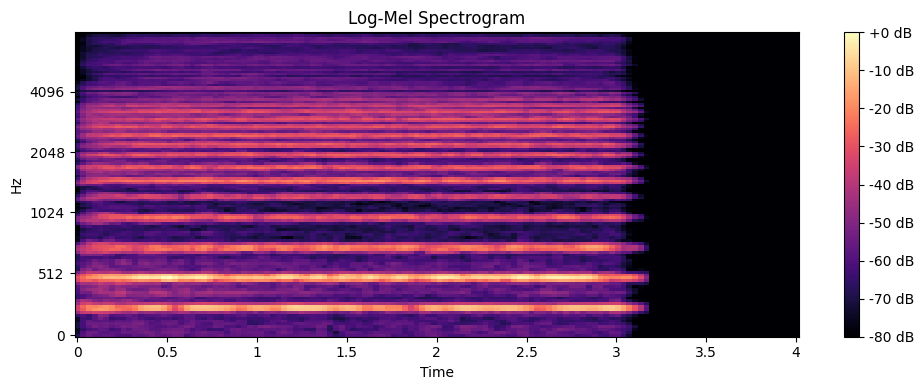

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_s, sr=example_audio['sampling_rate'], x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')
plt.tight_layout()
plt.show()

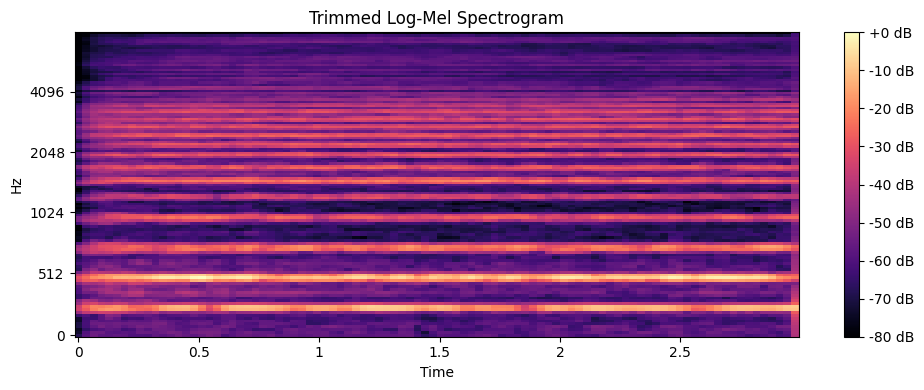

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_s_t, sr=example_audio['sampling_rate'], x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Trimmed Log-Mel Spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
df[['lm_spec', 'lm_spec_trimmed']]  = pd.DataFrame(df['audio'].apply(get_log_mel_spectrogram).tolist(), index=df.index)

In [ ]:
df

,note,note_str,instrument,instrument_str,pitch,velocity,sample_rate,qualities,qualities_str,instrument_family,instrument_family_str,instrument_source,instrument_source_str,WavPath,audio,lm_spec,lm_spec_trimmed
0,159151,guitar_acoustic_010-074-100,219,guitar_acoustic_010,74,100,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[],3,guitar,0,acoustic,audio/test/guitar_acoustic_010-074-100.wav,"{'path': 'guitar_acoustic_010-074-100.wav', 'a...","[[-53.803909328247705, -57.19402393504359, -80...","[[-53.803909328247705, -57.19402393504359, -80..."
1,165690,organ_electronic_113-048-075,958,organ_electronic_113,48,75,16000,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[dark],6,organ,1,electronic,audio/test/organ_electronic_113-048-075.wav,"{'path': 'organ_electronic_113-048-075.wav', '...","[[-41.581627035497604, -41.147029878223606, -5...","[[-41.581627035497604, -41.147029878223606, -5..."
2,212904,bass_synthetic_098-106-100,803,bass_synthetic_098,106,100,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[],0,bass,2,synthetic,audio/test/bass_synthetic_098-106-100.wav,"{'path': 'bass_synthetic_098-106-100.wav', 'ar...","[[-16.7511239198609, -14.60622370176982, -14.5...","[[-16.7511239198609, -14.60622370176982, -14.5..."
3,149013,bass_synthetic_033-100-100,417,bass_synthetic_033,100,100,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[],0,bass,2,synthetic,audio/test/bass_synthetic_033-100-100.wav,"{'path': 'bass_synthetic_033-100-100.wav', 'ar...","[[-2.217868374884816, 0.0, -2.2655613750807007...","[[-2.217868374884816, 0.0, -2.2655613750807007..."
4,230398,keyboard_synthetic_000-095-127,577,keyboard_synthetic_000,95,127,16000,"[1, 0, 1, 1, 0, 0, 1, 1, 0, 0]","[bright, distortion, fast_decay, nonlinear_env...",4,keyboard,2,synthetic,audio/test/keyboard_synthetic_000-095-127.wav,"{'path': 'keyboard_synthetic_000-095-127.wav',...","[[-39.48654566063367, -30.101491388568697, -29...","[[-39.48654566063367, -30.101491388568697, -29..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,208754,keyboard_synthetic_000-042-050,577,keyboard_synthetic_000,42,50,16000,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 0]","[distortion, fast_decay, nonlinear_env]",4,keyboard,2,synthetic,audio/test/keyboard_synthetic_000-042-050.wav,"{'path': 'keyboard_synthetic_000-042-050.wav',...","[[-22.894519269335113, -21.310778228485326, -2...","[[-22.894519269335113, -21.310778228485326, -2..."
4092,229348,bass_electronic_025-048-050,872,bass_electronic_025,48,50,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[],0,bass,1,electronic,audio/test/bass_electronic_025-048-050.wav,"{'path': 'bass_electronic_025-048-050.wav', 'a...","[[-50.4164882868474, -42.023726614070256, -39....","[[-50.4164882868474, -42.023726614070256, -39...."
4093,163864,mallet_acoustic_062-043-100,644,mallet_acoustic_062,43,100,16000,"[0, 1, 0, 0, 1, 1, 0, 0, 0, 0]","[dark, long_release, multiphonic]",5,mallet,0,acoustic,audio/test/mallet_acoustic_062-043-100.wav,"{'path': 'mallet_acoustic_062-043-100.wav', 'a...","[[-22.917633813951596, -27.114878825864423, -5...","[[-22.917633813951596, -27.114878825864423, -5..."
4094,2004,vocal_acoustic_000-059-127,46,vocal_acoustic_000,59,127,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",[reverb],10,vocal,0,acoustic,audio/test/vocal_acoustic_000-059-127.wav,"{'path': 'vocal_acoustic_000-059-127.wav', 'ar...","[[-68.29031416879671, -59.045591784729965, -54...","[[-68.29031416879671, -59.045591784729965, -54..."


In [ ]:
features_label = pd.DataFrame(df['lm_spec_trimmed'].values)
features_label

,0
0,"[[-53.803909328247705, -57.19402393504359, -80..."
1,"[[-41.581627035497604, -41.147029878223606, -5..."
2,"[[-16.7511239198609, -14.60622370176982, -14.5..."
3,"[[-2.217868374884816, 0.0, -2.2655613750807007..."
4,"[[-39.48654566063367, -30.101491388568697, -29..."
...,...
4091,"[[-22.894519269335113, -21.310778228485326, -2..."
4092,"[[-50.4164882868474, -42.023726614070256, -39...."
4093,"[[-22.917633813951596, -27.114878825864423, -5..."
4094,"[[-68.29031416879671, -59.045591784729965, -54..."


In [ ]:
features_label = pd.DataFrame(features_label[0].apply(lambda x: x.flatten()).tolist())
features_label

,0,1,2,3,4,5,6,7,8,9,...,12022,12023,12024,12025,12026,12027,12028,12029,12030,12031
0,-53.803909,-57.194024,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000
1,-41.581627,-41.147030,-50.666237,-64.943981,-60.756839,-60.464744,-60.993004,-63.912845,-61.711862,-62.382845,...,-80.0,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000
2,-16.751124,-14.606224,-14.500415,-14.003709,-14.280511,-14.614283,-15.854235,-16.143106,-17.500415,-20.172544,...,-80.0,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-74.445993
3,-2.217868,0.000000,-2.265561,-4.262692,-5.280903,-6.297461,-7.342139,-8.409485,-9.516589,-10.664447,...,-80.0,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000
4,-39.486546,-30.101491,-29.918419,-34.714702,-49.770357,-55.999469,-55.860402,-53.477410,-59.263462,-60.489511,...,-80.0,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,-22.894519,-21.310778,-27.454087,-33.497683,-33.068524,-32.833817,-32.720519,-32.592567,-32.394799,-32.219643,...,-80.0,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000
4092,-50.416488,-42.023727,-39.495096,-41.555525,-51.454520,-54.918152,-60.328524,-69.375597,-73.076184,-73.600458,...,-80.0,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000
4093,-22.917634,-27.114879,-52.179479,-67.841889,-68.402644,-65.043253,-62.685682,-72.406796,-67.885038,-63.723752,...,-80.0,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000
4094,-68.290314,-59.045592,-54.324949,-57.203160,-57.954304,-56.753415,-57.259861,-60.041177,-60.289779,-60.373389,...,-80.0,-80.0,-80.0,-80.0,-78.91858,-80.0,-80.0,-80.0,-80.0,-63.326588


In [ ]:
# Since there's no class 9 (Synth Lead), we change class 10 to 9 to avoid problem while ploting confusion matrix
features_label = features_label.join(df['instrument_family'].apply(lambda x: 9 if x == 10 else x))
features_label

,0,1,2,3,4,5,6,7,8,9,...,12023,12024,12025,12026,12027,12028,12029,12030,12031,instrument_family
0,-53.803909,-57.194024,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,3
1,-41.581627,-41.147030,-50.666237,-64.943981,-60.756839,-60.464744,-60.993004,-63.912845,-61.711862,-62.382845,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,6
2,-16.751124,-14.606224,-14.500415,-14.003709,-14.280511,-14.614283,-15.854235,-16.143106,-17.500415,-20.172544,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-74.445993,0
3,-2.217868,0.000000,-2.265561,-4.262692,-5.280903,-6.297461,-7.342139,-8.409485,-9.516589,-10.664447,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,0
4,-39.486546,-30.101491,-29.918419,-34.714702,-49.770357,-55.999469,-55.860402,-53.477410,-59.263462,-60.489511,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,-22.894519,-21.310778,-27.454087,-33.497683,-33.068524,-32.833817,-32.720519,-32.592567,-32.394799,-32.219643,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,4
4092,-50.416488,-42.023727,-39.495096,-41.555525,-51.454520,-54.918152,-60.328524,-69.375597,-73.076184,-73.600458,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,0
4093,-22.917634,-27.114879,-52.179479,-67.841889,-68.402644,-65.043253,-62.685682,-72.406796,-67.885038,-63.723752,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,5
4094,-68.290314,-59.045592,-54.324949,-57.203160,-57.954304,-56.753415,-57.259861,-60.041177,-60.289779,-60.373389,...,-80.0,-80.0,-80.0,-78.91858,-80.0,-80.0,-80.0,-80.0,-63.326588,9


In [ ]:
class_list = []
for inst in df['instrument_family_str']:
    if inst not in class_list:
        class_list.append(inst)
class_list

['guitar',
 'organ',
 'bass',
 'keyboard',
 'reed',
 'string',
 'mallet',
 'flute',
 'brass',
 'vocal']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import userdata
projPath = userdata.get('driveProjDir')

In [ ]:
features_label.to_csv(f'/content/drive/MyDrive/{projPath}/features_label.csv', index=False)